In [32]:
class System:
    def __init__(self):
        self.G = 6.67e-11
        self.ms = 2.0e30
        self.me = 5.972e24

        self.upperPart = self.G*self.me*self.ms #just only Gm1m2

        self.xe, self.ye, self.ze = 1.0167*1.5e11, 0, 0
        self.vxe, self.vye, self.vze = 0, 29290, 0 #velocity part

        self.xs, self.ys, self.zs = 0, 0, 0
        self.vxs, self.vys, self.vzs = 0, 0, 0

        self.t = 0
        self.dt = 24*60*60 # 1 day calc in to SI unit
        #dt just sep the orbit from 1 year to a day

    def calc_r(self):
        self.rx, self.ry, self.rz = self.xe-self.xs, self.ye-self.ys, self.ze-self.zs
        self.r_cube = (self.rx**2+self.ry**2+self.rz**2)**1.5 #r**3

    def calc_f(self):
        self.fxe = -self.upperPart*self.rx/self.r_cube
        self.fye = -self.upperPart*self.ry/self.r_cube
        self.fze = -self.upperPart*self.rz/self.r_cube

        self.fxs = -self.fxe
        self.fys = -self.fye
        self.fzs = -self.fze

    def calc_v(self):
        self.vxe += self.fxe/self.me*self.dt
        self.vye += self.fye/self.me*self.dt
        self.vze += self.fze/self.me*self.dt

        self.vxs += self.fxs/self.ms*self.dt
        self.vys += self.fys/self.ms*self.dt
        self.vzs += self.fzs/self.ms*self.dt

    def update_pos(self):
        self.xe += self.vxe*self.dt
        self.ye += self.vye*self.dt
        self.ze += self.vze*self.dt

        self.xs += self.vxs*self.dt
        self.ys += self.vys*self.dt
        self.zs += self.vzs*self.dt

    def update_t(self):
        self.t += self.dt

In [33]:
s = System()

xeLs, yeLs, zeLs = [], [], []
xsLs, ysLs, zsLs = [], [], []

while s.t < 365*s.dt:
    s.calc_r()
    s.calc_f()
    s.calc_v()
    s.update_pos()
    s.update_t()

    xeLs.append(s.xe)
    yeLs.append(s.ye)
    zeLs.append(s.ze)

    xsLs.append(s.xs)
    ysLs.append(s.ys)
    zsLs.append(s.zs)

In [34]:
import matplotlib.pyplot as plt

365


/var/folders/vn/_y1rl4y52sb3kx0xf36z3zv40000gn/T/ipykernel_7739/3522365869.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-g" (-> color='g'). The keyword argument will take precedence.
  line_e,     = ax.plot([],[],'-g',lw=1, c='blue')


RuntimeError: Requested MovieWriter (ffmpeg) not available

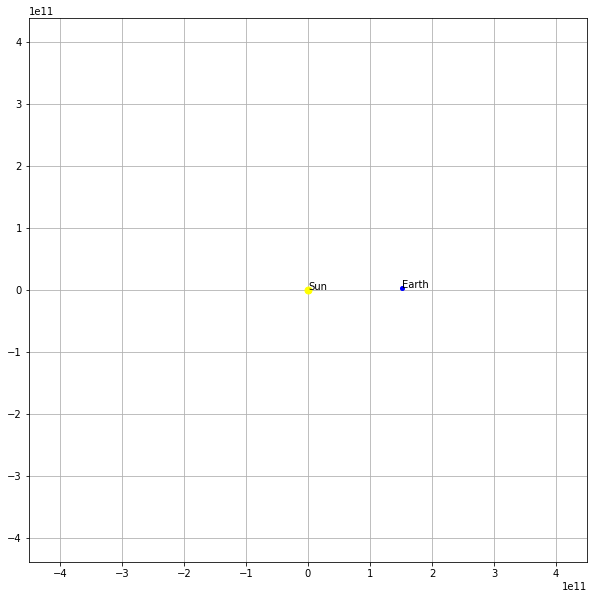

In [35]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython import display

fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ax.grid()

line_e,     = ax.plot([],[],'-g',lw=1, c='blue')
point_e,    = ax.plot([1.5e11], [0], marker="o"
                    , markersize=4
                    , markeredgecolor="blue"
                    , markerfacecolor="blue")
text_e      = ax.text(1.5e11,0,'Earth')

point_s,    = ax.plot([0], [0], marker="o"
                    , markersize=7
                    , markeredgecolor="yellow"
                    , markerfacecolor="yellow")
text_s      = ax.text(0,0,'Sun')

exdata,eydata = [],[]                   # earth track
sxdata,sydata = [],[]                   # sun track

print(len(xeLs))

def update(i):
    exdata.append(xeLs[i])
    eydata.append(yeLs[i])
    
    line_e.set_data(exdata,eydata)
    point_e.set_data(xeLs[i],yeLs[i])
    text_e.set_position((xeLs[i],yeLs[i]))

    point_s.set_data(xsLs[i],ysLs[i])
    text_s.set_position((xsLs[i],ysLs[i]))
    ax.axis('equal')
    ax.set_xlim(-3*1.5e11,3*1.5e11)
    ax.set_ylim(-3*1.5e11,3*1.5e11)

    return line_e,point_s,point_e,text_e,text_s

anim = animation.FuncAnimation(fig
                                ,func=update
                                ,frames=len(xeLs)
                                ,interval=1
                                ,blit=True)
video = anim.to_html5_video()

# embedding for the video
html = display.HTML(video)

# draw the animation
display.display(html)
plt.close()